In [2]:
from google.colab import drive


drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [3]:
Path = '/content/gdrive/MyDrive/IBM DS Project'

In [4]:
import pandas as pd
import numpy as np

In [5]:
player_df=pd.read_csv(Path+'/Player_performance.csv')
player_df.head()

,Match_id,Players_1,Bat_Runs_1,Ball Faced_1,Players_2,Bat_Runs_2,Ball Faced_2,Players_3,Bat_Runs_3,Ball Faced_3,Players_4,Bat_Runs_4,Ball Faced_4,Players_5,Bat_Runs_5,Ball Faced_5,Players_6,Bat_Runs_6,Ball Faced_6,Players_7,Bat_Runs_7,Ball Faced_7,Players_8,Bat_Runs_8,Ball Faced_8,Players_9,Bat_Runs_9,Ball Faced_9,Players_10,Bat_Runs_10,Ball Faced_10,Players_11,Bat_Runs_11,Ball Faced_11,Players_12,Bat_Runs_12,Ball Faced_12,Players_13,Bat_Runs_13,Ball Faced_13,Players_14,Bat_Runs_14,Ball Faced_14,Players_15,Bat_Runs_15,Ball Faced_15,Players_16,Bat_Runs_16,Ball Faced_16,Players_17,Bat_Runs_17,Ball Faced_17,Players_18,Bat_Runs_18,Ball Faced_18,Players_19,Bat_Runs_19,Ball Faced_19,Players_20,Bat_Runs_20,Ball Faced_20,Players_21,Bat_Runs_21,Ball Faced_21,Players_22,Bat_Runs_22,Ball Faced_22
0,1004261,G Malla,11,12,AK Mandal,20,39,S Vesawkar,14,70,P Khadka,0,1,Sagar Pun,7,31,R Rijal,3,2,B Bhandari,9,19,Sompal Kami,12,28,B Regmi,7,21,Karan KC,0,2,S Lamichhane,1,3,SJ Myburgh,33,39,MJG Rippon,6,9,W Barresi,37,32,BN Cooper,6,13,RE van der Merwe,4,6,T van der Gugten,-,-,Mudassar Bukhari,-,-,Ahsan Malik,-,-,PA van Meekeren,-,-,-,-,-,-,-,-
1,1004269,C Carter,41,62,KD Shah,1,3,Babar Hayat,78,68,Nizakat Khan,20,12,Anshuman Rath,3,5,Tanwir Afzal,-,-,Nadeem Ahmed,-,-,Aizaz Khan,-,-,Ehsan Khan,-,-,Tanveer Ahmed,-,-,-,-,-,IA Karim,33,40,AA Obanda,39,35,DM Gondaria,8,12,RR Patel,0,1,CO Obuya,17,20,NK Patel,0,4,Gurdeep Singh,13,10,NN Odhiambo,1,3,SO Ngoche,0,1,NM Odhiambo,11,6,LN Oluoch,1,2
2,1004283,KJ Coetzer,53,29,CD Wallace,14,8,CS MacLeod,28,17,MH Cross,1,5,RD Berrington,4,7,PL Mommsen,12,16,CD de Lange,26,26,SM Sharif,12,12,CB Sole,-,-,AC Evans,-,-,MRJ Watt,-,-,Nizakat Khan,43,24,Aizaz Khan,12,18,Babar Hayat,26,25,Anshuman Rath,32,27,Ehsan Khan,2,3,Tanwir Afzal,7,6,Nadeem Ahmed,-,-,Tanveer Ahmed,-,-,-,-,-,-,-,-,-,-,-
3,1004285,KJ Coetzer,48,41,MH Cross,13,22,CS MacLeod,102,106,MA Leask,12,23,RD Berrington,10,29,CD de Lange,11,18,CD Wallace,52,51,SM Sharif,2,2,MRJ Watt,1,2,AC Evans,-,-,CB Sole,-,-,C Carter,15,24,Aizaz Khan,25,40,Babar Hayat,56,66,Nizakat Khan,40,56,Anshuman Rath,13,20,Ehsan Khan,7,16,Shahid Wasif,4,8,Waqas Khan,8,17,Tanwir Afzal,20,16,Nadeem Ahmed,14,11,Tanveer Ahmed,0,1
4,1007649,PJ Moor,3,5,CJ Chibhabha,13,41,H Masakadza,14,21,CR Ervine,21,42,V Sibanda,5,20,Sikandar Raza,23,54,E Chigumbura,41,64,R Mutumbami,15,27,AG Cremer,8,11,TL Chatara,4,10,T Muzarabani,1,1,KL Rahul,100,115,KK Nair,7,20,AT Rayudu,62,119,DS Kulkarni,-,-,BB Sran,-,-,JJ Bumrah,-,-,AR Patel,-,-,YS Chahal,-,-,-,-,-,-,-,-,-,-,-


In [6]:
player_df.shape

(1905, 67)

In [7]:
missing= player_df.isna().sum()
missing

Match_id         0
Players_1        0
Bat_Runs_1       0
Ball Faced_1     0
Players_2        0
                ..
Bat_Runs_21      0
Ball Faced_21    0
Players_22       0
Bat_Runs_22      0
Ball Faced_22    0
Length: 67, dtype: int64

In [8]:
match_df=pd.read_csv(Path+'/Match.csv')
match_df

,Unnamed: 0,Match_id,Team1,Team2,Gender,Date,Season,Series/Competition,Match_number,Venue,City,Neutral_venue,Toss_winner,Toss_decision,Player_of_match,Umpire1,Umpire2,Reserve_umpire,Tv_umpire,Match_referee,Winner,Winner_runs,Winner_wickets,Method,Outcome
0,0,1000887,Australia,Pakistan,male,2017/01/13,2016/17,Pakistan in Australia ODI Series,1.0,"""Brisbane Cricket Ground",Brisbane,NaN,Australia,bat,MS Wade,MD Martell,C Shamshuddin,SJ Nogajski,CB Gaffaney,JJ Crowe,Australia,92.0,NaN,NaN,NaN
1,1,1000889,Australia,Pakistan,male,2017/01/15,2016/17,Pakistan in Australia ODI Series,2.0,Melbourne Cricket Ground,NaN,NaN,Australia,bat,Mohammad Hafeez,CB Gaffaney,P Wilson,SJ Nogajski,C Shamshuddin,JJ Crowe,Pakistan,NaN,6.0,NaN,NaN
2,2,1000891,Australia,Pakistan,male,2017/01/19,2016/17,Pakistan in Australia ODI Series,3.0,Western Australia Cricket Association Ground,Perth,NaN,Australia,field,SPD Smith,SD Fry,C Shamshuddin,P Wilson,CB Gaffaney,JJ Crowe,Australia,NaN,7.0,NaN,NaN
3,3,1000893,Australia,Pakistan,male,2017/01/22,2016/17,Pakistan in Australia ODI Series,4.0,Sydney Cricket Ground,NaN,NaN,Australia,bat,DA Warner,CB Gaffaney,MD Martell,P Wilson,C Shamshuddin,JJ Crowe,Australia,86.0,NaN,NaN,NaN
4,4,1000895,Australia,Pakistan,male,2017/01/26,2016/17,Pakistan in Australia ODI Series,5.0,Adelaide Oval,NaN,NaN,Australia,bat,DA Warner,SD Fry,C Shamshuddin,SJ Nogajski,CB Gaffaney,JJ Crowe,Australia,57.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1946,1946,997961,Ireland,Afghanistan,male,2016/07/12,2016,Afghanistan in Ireland ODI Series,2.0,"""Civil Service Cricket Club",Belfast,NaN,Ireland,field,NaN,AJ Neill,IN Ramage,R Black,NaN,DT Jukes,Afghanistan,39.0,NaN,NaN,NaN
1947,1947,997965,Ireland,Afghanistan,male,2016/07/17,2016,Afghanistan in Ireland ODI Series,4.0,"""Civil Service Cricket Club",Belfast,NaN,Afghanistan,bat,NaN,AJ Neill,C Shamshuddin,R Black,NaN,DT Jukes,Afghanistan,79.0,NaN,NaN,NaN
1948,1948,997967,Ireland,Afghanistan,male,2016/07/19,2016,Afghanistan in Ireland ODI Series,5.0,"""Civil Service Cricket Club",Belfast,NaN,Afghanistan,field,NaN,R Black,C Shamshuddin,AJ Neill,NaN,DT Jukes,Ireland,12.0,NaN,NaN,NaN
1949,1949,997993,Scotland,United Arab Emirates,male,2016/08/14,2016,"""ICC World Cricket League Championship",26.0,"""Grange Cricket Club Ground",Edinburgh,NaN,United Arab Emirates,field,NaN,DA Haggo,M Hawthorne,AJT Dowdalls,NaN,GF Labrooy,Scotland,98.0,NaN,NaN,NaN


In [9]:
match_df.columns

Index(['Unnamed: 0', 'Match_id', 'Team1', 'Team2', 'Gender', 'Date', 'Season',
       'Series/Competition', 'Match_number', 'Venue', 'City', 'Neutral_venue',
       'Toss_winner', 'Toss_decision', 'Player_of_match', 'Umpire1', 'Umpire2',
       'Reserve_umpire', 'Tv_umpire', 'Match_referee', 'Winner', 'Winner_runs',
       'Winner_wickets', 'Method', 'Outcome'],
      dtype='object')

In [10]:
match_df= match_df.drop(columns=['Umpire1', 'Umpire2','Reserve_umpire', 'Tv_umpire', 'Match_referee','Method','Outcome','Neutral_venue','Gender'],axis=1)

In [11]:
match_df.columns

Index(['Unnamed: 0', 'Match_id', 'Team1', 'Team2', 'Date', 'Season',
       'Series/Competition', 'Match_number', 'Venue', 'City', 'Toss_winner',
       'Toss_decision', 'Player_of_match', 'Winner', 'Winner_runs',
       'Winner_wickets'],
      dtype='object')

In [12]:
match_df.shape

(1951, 16)

In [13]:
missing_Val_Match= match_df.isnull().sum()
missing_Val_Match

Unnamed: 0               0
Match_id                 0
Team1                    0
Team2                    0
Date                     0
Season                   0
Series/Competition      30
Match_number           247
Venue                    0
City                   287
Toss_winner              0
Toss_decision            0
Player_of_match        142
Winner                  69
Winner_runs           1053
Winner_wickets         967
dtype: int64

In [14]:
merge_df =match_df.merge(player_df, on="Match_id", how="outer")

In [15]:
merge_df

,Unnamed: 0,Match_id,Team1,Team2,Date,Season,Series/Competition,Match_number,Venue,City,Toss_winner,Toss_decision,Player_of_match,Winner,Winner_runs,Winner_wickets,Players_1,Bat_Runs_1,Ball Faced_1,Players_2,Bat_Runs_2,Ball Faced_2,Players_3,Bat_Runs_3,Ball Faced_3,Players_4,Bat_Runs_4,Ball Faced_4,Players_5,Bat_Runs_5,Ball Faced_5,Players_6,Bat_Runs_6,Ball Faced_6,Players_7,Bat_Runs_7,Ball Faced_7,Players_8,Bat_Runs_8,Ball Faced_8,...,Ball Faced_9,Players_10,Bat_Runs_10,Ball Faced_10,Players_11,Bat_Runs_11,Ball Faced_11,Players_12,Bat_Runs_12,Ball Faced_12,Players_13,Bat_Runs_13,Ball Faced_13,Players_14,Bat_Runs_14,Ball Faced_14,Players_15,Bat_Runs_15,Ball Faced_15,Players_16,Bat_Runs_16,Ball Faced_16,Players_17,Bat_Runs_17,Ball Faced_17,Players_18,Bat_Runs_18,Ball Faced_18,Players_19,Bat_Runs_19,Ball Faced_19,Players_20,Bat_Runs_20,Ball Faced_20,Players_21,Bat_Runs_21,Ball Faced_21,Players_22,Bat_Runs_22,Ball Faced_22
0,0,1000887,Australia,Pakistan,2017/01/13,2016/17,Pakistan in Australia ODI Series,1.0,"""Brisbane Cricket Ground",Brisbane,Australia,bat,MS Wade,Australia,92.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,1000889,Australia,Pakistan,2017/01/15,2016/17,Pakistan in Australia ODI Series,2.0,Melbourne Cricket Ground,NaN,Australia,bat,Mohammad Hafeez,Pakistan,NaN,6.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,1000891,Australia,Pakistan,2017/01/19,2016/17,Pakistan in Australia ODI Series,3.0,Western Australia Cricket Association Ground,Perth,Australia,field,SPD Smith,Australia,NaN,7.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,1000893,Australia,Pakistan,2017/01/22,2016/17,Pakistan in Australia ODI Series,4.0,Sydney Cricket Ground,NaN,Australia,bat,DA Warner,Australia,86.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,1000895,Australia,Pakistan,2017/01/26,2016/17,Pakistan in Australia ODI Series,5.0,Adelaide Oval,NaN,Australia,bat,DA Warner,Australia,57.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1946,1946,997961,Ireland,Afghanistan,2016/07/12,2016,Afghanistan in Ireland ODI Series,2.0,"""Civil Service Cricket Club",Belfast,Ireland,field,NaN,Afghanistan,39.0,NaN,Mohammad Shahzad,66.0,74.0,Javed Ahmadi,29.0,42.0,Rahmat Shah,14.0,25.0,Samiullah Shenwari,24,35,Asghar Stanikzai,0,7,Najibullah Zadran,59,61,Mohammad Nabi,5,10,Dawlat Zadran,7,9,...,12,Rashid Khan,18,11,Shapoor Zadran,2,6,WTS Porterfield,25,42,EC Joyce,62,87,J Anderson,26,50,SW Poynter,0,3,KJ O'Brien,35,26,PR Stirling,16,21,AR McBrine,12,21,GH Dockrell,6,13,BJ McCarthy,3,9,TJ Murtagh,7,11,PKD Chase,1,2
1947,1947,997965,Ireland,Afghanistan,2016/07/17,

In [218]:
plot1=merge_df2['Winner'].value_counts(). head(5)
plot1

Australia       209
India           201
South Africa    171
England         153
Sri Lanka       152
Name: Winner, dtype: int64

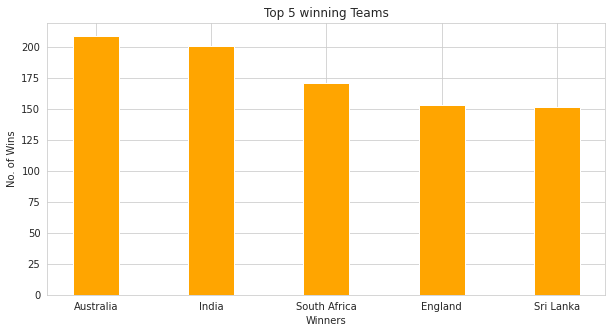

In [223]:
# creating the dataset
data = {'Australia':209, 'India':201, 'South Africa':171,
        'England':153,'Sri Lanka':152}
courses = list(data.keys())
values = list(data.values())
  
fig = plt.figure(figsize = (10, 5))
 
# creating the bar plot
plt.bar(courses, values, color ='orange',
        width = 0.4)
 
plt.xlabel("Winners")
plt.ylabel("No. of Wins")
plt.title("Top 5 winning Teams")
plt.show()

In [16]:
merge_df.isnull().sum()

Unnamed: 0        0
Match_id          0
Team1             0
Team2             0
Date              0
                 ..
Bat_Runs_21      46
Ball Faced_21    46
Players_22       46
Bat_Runs_22      46
Ball Faced_22    46
Length: 82, dtype: int64

In [17]:
merge_df.to_csv('merge.csv')

In [18]:
merge_df=pd.read_csv(Path+'/merge.csv')
merge_df

,Match_id,Team1,Team2,Date,Season,Series/Competition,Match_number,Venue,City,Toss_winner,Toss_decision,Player_of_match,Winner,Winner_runs,Winner_wickets,Players_1,Bat_Runs_1,Ball Faced_1,Players_2,Bat_Runs_2,Ball Faced_2,Players_3,Bat_Runs_3,Ball Faced_3,Players_4,Bat_Runs_4,Ball Faced_4,Players_5,Bat_Runs_5,Ball Faced_5,Players_6,Bat_Runs_6,Ball Faced_6,Players_7,Bat_Runs_7,Ball Faced_7,Players_8,Bat_Runs_8,Ball Faced_8,Players_9,...,Ball Faced_9,Players_10,Bat_Runs_10,Ball Faced_10,Players_11,Bat_Runs_11,Ball Faced_11,Players_12,Bat_Runs_12,Ball Faced_12,Players_13,Bat_Runs_13,Ball Faced_13,Players_14,Bat_Runs_14,Ball Faced_14,Players_15,Bat_Runs_15,Ball Faced_15,Players_16,Bat_Runs_16,Ball Faced_16,Players_17,Bat_Runs_17,Ball Faced_17,Players_18,Bat_Runs_18,Ball Faced_18,Players_19,Bat_Runs_19,Ball Faced_19,Players_20,Bat_Runs_20,Ball Faced_20,Players_21,Bat_Runs_21,Ball Faced_21,Players_22,Bat_Runs_22,Ball Faced_22
0,1004261,Netherlands,Nepal,8/13/2016,2016,"""ICC World Cricket League Championship",25.0,VRA Ground,Amstelveen,Netherlands,field,NaN,Netherlands,NaN,7.0,G Malla,11,12,AK Mandal,20,39,S Vesawkar,14,70,P Khadka,0,1,Sagar Pun,7,31,R Rijal,3,2,B Bhandari,9,19,Sompal Kami,12,28,B Regmi,...,21,Karan KC,0,2,S Lamichhane,1,3,SJ Myburgh,33,39,MJG Rippon,6,9,W Barresi,37,32,BN Cooper,6,13,RE van der Merwe,4,6,T van der Gugten,0,0,Mudassar Bukhari,0,0,Ahsan Malik,0,0,PA van Meekeren,0,0,0,0,0,0,0,0
1,1004269,Kenya,Hong Kong,11/20/2016,2016/17,"""ICC World Cricket League Championship",32.0,Gymkhana Club Ground,Nairobi,Kenya,field,Babar Hayat,Hong Kong,39.0,NaN,C Carter,41,62,KD Shah,1,3,Babar Hayat,78,68,Nizakat Khan,20,12,Anshuman Rath,3,5,Tanwir Afzal,0,0,Nadeem Ahmed,0,0,Aizaz Khan,0,0,Ehsan Khan,...,0,Tanveer Ahmed,0,0,0,0,0,IA Karim,33,40,AA Obanda,39,35,DM Gondaria,8,12,RR Patel,0,1,CO Obuya,17,20,NK Patel,0,4,Gurdeep Singh,13,10,NN Odhiambo,1,3,SO Ngoche,0,1,NM Odhiambo,11,6,LN Oluoch,1,2
2,1004283,Scotland,Hong Kong,9/8/2016,2016,Hong Kong in Scotland ODI Series,1.0,"""Grange Cricket Club Ground",Edinburgh,Hong Kong,field,NaN,NaN,NaN,NaN,KJ Coetzer,53,29,CD Wallace,14,8,CS MacLeod,28,17,MH Cross,1,5,RD Berrington,4,7,PL Mommsen,12,16,CD de Lange,26,26,SM Sharif,12,12,CB Sole,...,0,AC Evans,0,0,MRJ Watt,0,0,Nizakat Khan,43,24,Aizaz Khan,12,18,Babar Hayat,26,25,Anshuman Rath,32,27,Ehsan Khan,2,3,Tanwir Afzal,7,6,Nadeem Ahmed,0,0,Tanveer Ahmed,0,0,0,0,0,0,0,0,0,0,0
3,1004285,Scotland,Hong Kong,9/10/2016,2016,Hong Kong in Scotland ODI Series,2.0,"""Grange Cricket Club Ground",Edinburgh,Scotland,bat,NaN,Scotland,53.0,NaN,KJ Coetzer,48,41,MH Cross,13,22,CS MacLeod,102,106,MA Leask,12,23,RD Berrington,10,29,CD de Lange,11,18,CD Wallace,52,51,SM Sharif,2,2,MRJ Watt,...,2,AC Evans,0,0,CB Sole,0,0,C Carter,15,24,Aizaz Khan,25,40,Babar Hayat,56,66,Nizakat Khan,40,56,Anshuman Rath,13,20,Ehsan Khan,7,16,Shahid Wasif,4,8,Waqas Khan,8,17,Tanwir Afzal,20,16,Nadeem Ahmed,14,11,Tanveer Ahmed,0,1
4,1007649,Zimbabwe,India,6/11/2016,2016,India in Zimbabwe ODI Series,1.0,Harare Sports Club,NaN,India,field,KL Rahul,India,NaN,9.0,PJ Moor,3,5,CJ Chibhabha,13,41,H Masakadza,14,21,CR Ervine,21,42,V Sibanda,5,20,Sikandar Raza,23,54,E Chigumbura,41,64,R Mutumbami,15,27,AG Cremer,...,11,TL Chatara,4,10,T Muzarabani,1,1,KL Rahul,100,115,KK Nair,7,20,AT Rayudu,62,119,DS Kulkarni,0,0,BB Sran,0,0,JJ Bumrah,0,0,AR Patel,0,0,YS Chahal,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1900,997961,Ireland,Afghanistan,7/12/2016,2016,Afghanistan in Ireland ODI Series,2.0,"""Civil Service Cricket Club",Belfast,Ireland,field,NaN,Afghanistan,39.0,NaN,Mohammad Shahzad,66,74,Javed Ahmadi,29,42,Rahmat Shah,14,25,Samiullah Shenwari,24,35,Asghar Stanikzai,0,7,Najibull

In [19]:
merge_df.isna().sum()

Match_id         0
Team1            0
Team2            0
Date             0
Season           0
                ..
Bat_Runs_21      0
Ball Faced_21    0
Players_22       0
Bat_Runs_22      0
Ball Faced_22    0
Length: 81, dtype: int64

In [20]:
merge_df = merge_df.replace(np.nan, '', regex=True)

In [21]:
merge_df.columns

Index(['Match_id', 'Team1', 'Team2', 'Date', 'Season', 'Series/Competition',
       'Match_number', 'Venue', 'City', 'Toss_winner', 'Toss_decision',
       'Player_of_match', 'Winner', 'Winner_runs', 'Winner_wickets',
       'Players_1', 'Bat_Runs_1', 'Ball Faced_1', 'Players_2', 'Bat_Runs_2',
       'Ball Faced_2', 'Players_3', 'Bat_Runs_3', 'Ball Faced_3', 'Players_4',
       'Bat_Runs_4', 'Ball Faced_4', 'Players_5', 'Bat_Runs_5', 'Ball Faced_5',
       'Players_6', 'Bat_Runs_6', 'Ball Faced_6', 'Players_7', 'Bat_Runs_7',
       'Ball Faced_7', 'Players_8', 'Bat_Runs_8', 'Ball Faced_8', 'Players_9',
       'Bat_Runs_9', 'Ball Faced_9', 'Players_10', 'Bat_Runs_10',
       'Ball Faced_10', 'Players_11', 'Bat_Runs_11', 'Ball Faced_11',
       'Players_12', 'Bat_Runs_12', 'Ball Faced_12', 'Players_13',
       'Bat_Runs_13', 'Ball Faced_13', 'Players_14', 'Bat_Runs_14',
       'Ball Faced_14', 'Players_15', 'Bat_Runs_15', 'Ball Faced_15',
       'Players_16', 'Bat_Runs_16', 'Ball Faced_1

In [22]:
merge_df.isna().sum()

Match_id         0
Team1            0
Team2            0
Date             0
Season           0
                ..
Bat_Runs_21      0
Ball Faced_21    0
Players_22       0
Bat_Runs_22      0
Ball Faced_22    0
Length: 81, dtype: int64

In [23]:
merge_df

,Match_id,Team1,Team2,Date,Season,Series/Competition,Match_number,Venue,City,Toss_winner,Toss_decision,Player_of_match,Winner,Winner_runs,Winner_wickets,Players_1,Bat_Runs_1,Ball Faced_1,Players_2,Bat_Runs_2,Ball Faced_2,Players_3,Bat_Runs_3,Ball Faced_3,Players_4,Bat_Runs_4,Ball Faced_4,Players_5,Bat_Runs_5,Ball Faced_5,Players_6,Bat_Runs_6,Ball Faced_6,Players_7,Bat_Runs_7,Ball Faced_7,Players_8,Bat_Runs_8,Ball Faced_8,Players_9,...,Ball Faced_9,Players_10,Bat_Runs_10,Ball Faced_10,Players_11,Bat_Runs_11,Ball Faced_11,Players_12,Bat_Runs_12,Ball Faced_12,Players_13,Bat_Runs_13,Ball Faced_13,Players_14,Bat_Runs_14,Ball Faced_14,Players_15,Bat_Runs_15,Ball Faced_15,Players_16,Bat_Runs_16,Ball Faced_16,Players_17,Bat_Runs_17,Ball Faced_17,Players_18,Bat_Runs_18,Ball Faced_18,Players_19,Bat_Runs_19,Ball Faced_19,Players_20,Bat_Runs_20,Ball Faced_20,Players_21,Bat_Runs_21,Ball Faced_21,Players_22,Bat_Runs_22,Ball Faced_22
0,1004261,Netherlands,Nepal,8/13/2016,2016,"""ICC World Cricket League Championship",25,VRA Ground,Amstelveen,Netherlands,field,,Netherlands,,7,G Malla,11,12,AK Mandal,20,39,S Vesawkar,14,70,P Khadka,0,1,Sagar Pun,7,31,R Rijal,3,2,B Bhandari,9,19,Sompal Kami,12,28,B Regmi,...,21,Karan KC,0,2,S Lamichhane,1,3,SJ Myburgh,33,39,MJG Rippon,6,9,W Barresi,37,32,BN Cooper,6,13,RE van der Merwe,4,6,T van der Gugten,0,0,Mudassar Bukhari,0,0,Ahsan Malik,0,0,PA van Meekeren,0,0,0,0,0,0,0,0
1,1004269,Kenya,Hong Kong,11/20/2016,2016/17,"""ICC World Cricket League Championship",32,Gymkhana Club Ground,Nairobi,Kenya,field,Babar Hayat,Hong Kong,39,,C Carter,41,62,KD Shah,1,3,Babar Hayat,78,68,Nizakat Khan,20,12,Anshuman Rath,3,5,Tanwir Afzal,0,0,Nadeem Ahmed,0,0,Aizaz Khan,0,0,Ehsan Khan,...,0,Tanveer Ahmed,0,0,0,0,0,IA Karim,33,40,AA Obanda,39,35,DM Gondaria,8,12,RR Patel,0,1,CO Obuya,17,20,NK Patel,0,4,Gurdeep Singh,13,10,NN Odhiambo,1,3,SO Ngoche,0,1,NM Odhiambo,11,6,LN Oluoch,1,2
2,1004283,Scotland,Hong Kong,9/8/2016,2016,Hong Kong in Scotland ODI Series,1,"""Grange Cricket Club Ground",Edinburgh,Hong Kong,field,,,,,KJ Coetzer,53,29,CD Wallace,14,8,CS MacLeod,28,17,MH Cross,1,5,RD Berrington,4,7,PL Mommsen,12,16,CD de Lange,26,26,SM Sharif,12,12,CB Sole,...,0,AC Evans,0,0,MRJ Watt,0,0,Nizakat Khan,43,24,Aizaz Khan,12,18,Babar Hayat,26,25,Anshuman Rath,32,27,Ehsan Khan,2,3,Tanwir Afzal,7,6,Nadeem Ahmed,0,0,Tanveer Ahmed,0,0,0,0,0,0,0,0,0,0,0
3,1004285,Scotland,Hong Kong,9/10/2016,2016,Hong Kong in Scotland ODI Series,2,"""Grange Cricket Club Ground",Edinburgh,Scotland,bat,,Scotland,53,,KJ Coetzer,48,41,MH Cross,13,22,CS MacLeod,102,106,MA Leask,12,23,RD Berrington,10,29,CD de Lange,11,18,CD Wallace,52,51,SM Sharif,2,2,MRJ Watt,...,2,AC Evans,0,0,CB Sole,0,0,C Carter,15,24,Aizaz Khan,25,40,Babar Hayat,56,66,Nizakat Khan,40,56,Anshuman Rath,13,20,Ehsan Khan,7,16,Shahid Wasif,4,8,Waqas Khan,8,17,Tanwir Afzal,20,16,Nadeem Ahmed,14,11,Tanveer Ahmed,0,1
4,1007649,Zimbabwe,India,6/11/2016,2016,India in Zimbabwe ODI Series,1,Harare Sports Club,,India,field,KL Rahul,India,,9,PJ Moor,3,5,CJ Chibhabha,13,41,H Masakadza,14,21,CR Ervine,21,42,V Sibanda,5,20,Sikandar Raza,23,54,E Chigumbura,41,64,R Mutumbami,15,27,AG Cremer,...,11,TL Chatara,4,10,T Muzarabani,1,1,KL Rahul,100,115,KK Nair,7,20,AT Rayudu,62,119,DS Kulkarni,0,0,BB Sran,0,0,JJ Bumrah,0,0,AR Patel,0,0,YS Chahal,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1900,997961,Ireland,Afghanistan,7/12/2016,2016,Afghanistan in Ireland ODI Series,2,"""Civil Service Cricket Club",Belfast,Ireland,field,,Afghanistan,39,,Mohammad Shahzad,66,74,Javed Ahmadi,29,42,Rahmat Shah,14,25,Samiullah Shenwari,24,35,Asghar Stanikzai,0,7,Najibullah Zadran,59,61,Mohammad Nabi,5,10,Dawlat Zadran,7,9,Mirwais 

In [24]:
merge_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1905 entries, 0 to 1904
Data columns (total 81 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Match_id            1905 non-null   int64 
 1   Team1               1905 non-null   object
 2   Team2               1905 non-null   object
 3   Date                1905 non-null   object
 4   Season              1905 non-null   object
 5   Series/Competition  1905 non-null   object
 6   Match_number        1905 non-null   object
 7   Venue               1905 non-null   object
 8   City                1905 non-null   object
 9   Toss_winner         1905 non-null   object
 10  Toss_decision       1905 non-null   object
 11  Player_of_match     1905 non-null   object
 12  Winner              1905 non-null   object
 13  Winner_runs         1905 non-null   object
 14  Winner_wickets      1905 non-null   object
 15  Players_1           1905 non-null   object
 16  Bat_Runs_1          1905

In [24]:
merge_df.dtypes

Match_id          int64
Team1            object
Team2            object
Date             object
Season           object
                  ...  
Bat_Runs_21       int64
Ball Faced_21     int64
Players_22       object
Bat_Runs_22       int64
Ball Faced_22     int64
Length: 81, dtype: object

In [25]:
merge_df['Series/Competition'] = merge_df['Series/Competition'].astype('|S')
merge_df['Venue'] = merge_df['Venue'].astype('|S')
merge_df['City'] = merge_df['City'].astype('|S')
merge_df['Toss_winner'] = merge_df['Toss_winner'].astype('|S')
merge_df['Player_of_match'] = merge_df['Player_of_match'].astype('|S')
merge_df['Winner'] = merge_df['Winner'].astype('|S')

merge_df['Team1'] = merge_df['Team1'].astype('|S')
merge_df['Team2'] = merge_df['Team2'].astype('|S')
merge_df['Date'] = merge_df['Date'].astype('|S')
merge_df['Season'] = merge_df['Season'].astype('|S')
merge_df['Toss_decision'] = merge_df['Toss_decision'].astype('|S')

merge_df['Match_number'] = merge_df['Match_number'].apply(pd.to_numeric, errors='coerce')
merge_df['Winner_runs'] = merge_df['Winner_runs'].apply(pd.to_numeric, errors='coerce')
merge_df['Winner_wickets'] = merge_df['Winner_wickets'].apply(pd.to_numeric, errors='coerce')



merge_df['Players_1'] = merge_df['Players_1'].astype('|S')
merge_df['Players_2'] = merge_df['Players_2'].astype('|S')
merge_df['Players_3'] = merge_df['Players_3'].astype('|S')
merge_df['Players_4'] = merge_df['Players_4'].astype('|S')
merge_df['Players_5'] = merge_df['Players_5'].astype('|S')
merge_df['Players_6'] = merge_df['Players_6'].astype('|S')
merge_df['Players_7'] = merge_df['Players_7'].astype('|S')
merge_df['Players_8'] = merge_df['Players_8'].astype('|S')
merge_df['Players_9'] = merge_df['Players_9'].astype('|S')
merge_df['Players_10'] = merge_df['Players_10'].astype('|S')
merge_df['Players_11'] = merge_df['Players_11'].astype('|S')
merge_df['Players_12'] = merge_df['Players_12'].astype('|S')
merge_df['Players_13'] = merge_df['Players_13'].astype('|S')
merge_df['Players_14'] = merge_df['Players_14'].astype('|S')
merge_df['Players_15'] = merge_df['Players_15'].astype('|S')
merge_df['Players_16'] = merge_df['Players_16'].astype('|S')
merge_df['Players_17'] = merge_df['Players_17'].astype('|S')
merge_df['Players_18'] = merge_df['Players_18'].astype('|S')
merge_df['Players_19'] = merge_df['Players_19'].astype('|S')
merge_df['Players_20'] = merge_df['Players_20'].astype('|S')
merge_df['Players_21'] = merge_df['Players_21'].astype('|S')
merge_df['Players_22'] = merge_df['Players_22'].astype('|S')

In [26]:
from sklearn.preprocessing import LabelEncoder
var_mod = ['Team1', 'Team2', 'Date', 'Season', 'Series/Competition',
       'Match_number', 'Venue', 'City', 'Toss_winner', 'Player_of_match','Toss_decision',
       'Winner', 'Winner_runs', 'Winner_wickets','Bat_Runs_1', 'Ball Faced_1','Bat_Runs_2', 'Ball Faced_2',
       'Bat_Runs_3', 'Ball Faced_3','Bat_Runs_4', 'Ball Faced_4','Bat_Runs_5', 'Ball Faced_5',
       'Bat_Runs_6', 'Ball Faced_6','Bat_Runs_7', 'Ball Faced_7','Bat_Runs_8', 'Ball Faced_8',
       'Bat_Runs_9', 'Ball Faced_9','Bat_Runs_10', 'Ball Faced_10','Bat_Runs_11', 'Ball Faced_11','Bat_Runs_12', 'Ball Faced_12',
       'Bat_Runs_13', 'Ball Faced_13','Bat_Runs_14', 'Ball Faced_14','Bat_Runs_15', 'Ball Faced_15','Bat_Runs_16', 'Ball Faced_16','Bat_Runs_17', 'Ball Faced_18',
       'Bat_Runs_19', 'Ball Faced_19','Bat_Runs_20', 'Ball Faced_20','Bat_Runs_21', 'Ball Faced_21','Bat_Runs_22', 'Ball Faced_22', 
       'Players_1','Players_2','Players_3', 'Players_4', 'Players_5', 'Players_6', 'Players_7',
       'Players_8', 'Players_9', 'Players_10', 'Players_11', 'Players_12',
       'Players_13', 'Players_14', 'Players_15', 'Players_16', 'Players_17',
       'Players_18', 'Players_19', 'Players_20', 'Players_21', 'Players_22']
le = LabelEncoder()
for i in var_mod:
    merge_df[i] = le.fit_transform(merge_df[i])
merge_df

,Match_id,Team1,Team2,Date,Season,Series/Competition,Match_number,Venue,City,Toss_winner,Toss_decision,Player_of_match,Winner,Winner_runs,Winner_wickets,Players_1,Bat_Runs_1,Ball Faced_1,Players_2,Bat_Runs_2,Ball Faced_2,Players_3,Bat_Runs_3,Ball Faced_3,Players_4,Bat_Runs_4,Ball Faced_4,Players_5,Bat_Runs_5,Ball Faced_5,Players_6,Bat_Runs_6,Ball Faced_6,Players_7,Bat_Runs_7,Ball Faced_7,Players_8,Bat_Runs_8,Ball Faced_8,Players_9,...,Ball Faced_9,Players_10,Bat_Runs_10,Ball Faced_10,Players_11,Bat_Runs_11,Ball Faced_11,Players_12,Bat_Runs_12,Ball Faced_12,Players_13,Bat_Runs_13,Ball Faced_13,Players_14,Bat_Runs_14,Ball Faced_14,Players_15,Bat_Runs_15,Ball Faced_15,Players_16,Bat_Runs_16,Ball Faced_16,Players_17,Bat_Runs_17,Ball Faced_17,Players_18,Bat_Runs_18,Ball Faced_18,Players_19,Bat_Runs_19,Ball Faced_19,Players_20,Bat_Runs_20,Ball Faced_20,Players_21,Bat_Runs_21,Ball Faced_21,Players_22,Bat_Runs_22,Ball Faced_22
0,1004261,42,40,1335,21,1,24,210,5,42,1,0,41,547,6,107,11,11,20,20,38,391,14,69,289,0,1,427,7,31,434,3,2,68,9,19,574,12,28,81,...,21,288,0,2,412,1,3,313,33,39,258,6,9,498,37,32,66,6,13,440,4,6,641,0,0,454,0,0,64,0,0,436,0,0,0,0,0,0,0,0
1,1004269,32,23,330,22,1,31,91,103,30,1,88,24,38,36,57,41,61,204,1,2,74,78,67,286,20,12,42,3,5,559,0,0,423,0,0,64,0,0,173,...,0,548,0,0,0,0,0,127,33,40,5,39,35,128,8,12,395,0,1,130,17,20,447,0,4,221,13,10,442,1,3,533,0,1,379,11,6,267,1,2
2,1004283,57,23,1512,21,61,0,8,55,24,1,0,0,772,11,175,53,28,71,14,7,99,28,16,234,1,5,355,4,7,415,12,16,96,26,26,541,12,12,109,...,0,33,0,0,305,0,0,253,43,24,42,12,18,81,26,25,49,32,27,180,2,3,661,7,6,475,0,0,639,0,0,0,0,0,0,0,0,0,0,0
3,1004285,57,23,1427,21,61,1,8,55,57,0,0,56,52,67,175,48,40,255,13,21,99,102,105,229,12,23,355,10,29,97,11,18,95,52,51,541,2,2,361,...,2,33,0,0,90,0,0,57,15,24,42,25,40,81,56,66,353,40,56,67,13,20,182,7,16,654,4,8,664,8,17,602,20,16,384,14,11,486,0,1
4,1007649,73,24,1087,21,95,0,93,0,25,1,291,25,771,8,275,3,4,73,13,40,153,14,20,70,21,42,469,5,20,534,23,54,159,41,64,464,15,27,29,...,11,544,4,10,478,1,1,165,100,115,203,7,20,45,62,119,123,0,0,84,0,0,262,0,0,46,0,0,668,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1900,997961,28,1,1246,21,4,1,5,13,26,1,0,2,38,13,246,66,73,190,29,41,380,14,24,375,24,35,45,0,7,390,59,61,394,5,10,160,7,9,371,...,12,455,18,11,468,2,6,368,25,42,113,62,87,198,26,50,452,0,3,295,35,26,488,16,21,44,12,21,191,6,13,88,3,9,557,7,11,355,1,2
1901,997965,28,1,1258,21,4,3,5,13,1,0,0,2,78,179,246,22,34,309,10,8,380,48,69,375,11,25,45,0,4,390,3,18,394,50,67,504,58,44,371,...,25,153,0,0,518,0,0,368,16,27,113,12,21,438,9,28,452,15,22,295,34,46,488,31,51,207,6,13,44,1,6,88,10,15,557,1,6,355,0,7
1902,997967,28,1,1262,21,4,4,5,13,1,1,0,26,11,93,365,8,19,108,140,144,415,4,14,110,58,92,222,1,5,419,2,4,556,12,14,589,0,0,91,...,0,408,0,0,40,0,0,234,7,6,185,3,10,402,30,55,160,2,10,69,32,63,423,25,32,477,54,65,531,40,30,379,0,1,145,31,15,510,3,7
1903,997993,57,66,1338,21,1,25,8,55,70,1,0,56,97,519,175,123,117,71,16,14,99,20,31,296,111,100,260,10,7,438,27,16,96,7,6,247,0,0,505,...,0,33,0,0,0,0,0,290,43,47,223,28,30,331,28,33,462,9,12,387,34,49,534,15,28,443,2,4,330,15,26,68,32,19,523,11,8,55,1,2


In [27]:
x=merge_df[['Team1', 'Team2', 'Season', 'Series/Competition',
        'Venue', 'Toss_decision', 'Player_of_match',
       'Winner','Players_2',]]

In [ ]:
x=merge_df[['Team1', 'Team2','Venue', 'City','Bat_Runs_1', 'Ball Faced_1','Players_2']]

In [30]:
y=merge_df2[['Players_1']]

In [31]:
from sklearn.model_selection import train_test_split  
x_train, x_test, y_train, y_test= train_test_split(x, y, test_size= 0.20, random_state=0)

In [33]:
from sklearn.svm import SVC # "Support vector classifier" 
from sklearn.metrics import accuracy_score, confusion_matrix 
classifier = SVC(kernel='rbf', C=1, gamma=1) 
classifier.fit(x_train, y_train)  
y_pred = classifier.predict(x_test)
acc = accuracy_score(y_true=y_test, y_pred=y_pred)
print(acc)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.03412073490813648


In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
gb_clf= GradientBoostingClassifier(n_estimators=1, learning_rate=0.1, max_depth=3, random_state=42)
gb_clf.fit(x_train, y_train)
outcome= np.sort(gb_clf.predict(x_test),axis=0)

print("Accuracy score (training): {0:.3f}".format(gb_clf.score(x_train, y_train)))
print("Accuracy score (validation): {0:.3f}".format(gb_clf.score(x_test, y_test)))

/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy score (training): 0.595
Accuracy score (validation): 0.189


In [ ]:
from sklearn import tree
model = tree.DecisionTreeClassifier(criterion='gini')
model.fit(x_train, y_train)

pred=model.predict(x_test)

print("Accuracy score (validation): {0:.3f}".format(model.score(x_test, y_test)))


Accuracy score (validation): 0.279


In [163]:
from sklearn.neighbors import KNeighborsClassifier
knn_clf = KNeighborsClassifier(n_neighbors=3)
knn_clf.fit(x_train,y_train)
result=knn_clf.predict(x_test)
print("Accuracy score (validation): {0:.3f}".format(knn_clf.score(x_test, y_test)))

Accuracy score (validation): 0.058


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


In [34]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=100)
model.fit(x_train, y_train)

pred1=model.predict(x_test)
m1=model.score(x_test, y_test)
print("Accuracy score (validation): {0:.3f}".format(model.score(x_test, y_test)))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


Accuracy score (validation): 0.444


In [36]:
num_list = pred1.tolist() # list
print(num_list)
 

['SC Ganguly', 'MJ Guptill', 'Salman Butt', 'CL White', 'Tamim Iqbal', 'IR Bell', 'JA Burns', 'SA Yadav', 'Azhar Ali', 'JJ Roy', 'SW Bates', 'JD Ryder', 'MDKJ Perera', 'AM Rahane', 'Mohammad Hafeez', 'WU Tharanga', 'RG Mukasa', 'PA Patel', 'RS Bopara', 'Muhammad Kaleem', 'GK Diviya', 'V Sibanda', 'AJ Strauss', 'N Dickwella', 'Tamim Iqbal', 'BRM Taylor', 'AJ Strauss', 'WU Tharanga', 'E Lewis', 'OSM Rae', 'HM Amla', 'JA Burns', 'L Vincent', 'DA Warner', 'Azhar Ali', 'Q de Kock', 'V Sibanda', 'L Tshuma', 'AR Patwa', 'L Tshuma', 'Q de Kock', 'JD Ryder', 'Tamim Iqbal', 'AJ Strauss', 'DM de Silva', 'AN Cook', 'Q de Kock', 'AT Carey', 'AC Gilchrist', 'V Sibanda', 'MJ Guptill', 'Ayesha Zafar', 'ADS Fletcher', 'WU Tharanga', 'ST Jayasuriya', 'SW Bates', 'JJ Roy', 'DR Smith', 'CH Gayle', 'AM Rahane', 'ST Jayasuriya', 'Q de Kock', 'Kamran Akmal', 'BRM Taylor', 'DC Stovell', 'SR Watson', 'LMP Simmons', 'J Charles', 'G Gambhir', 'AM Rahane', 'SR Watson', 'MV Waldron', 'Tamim Iqbal', 'DR Smith', 'PW

In [37]:
 
def most_frequent(List):
    counter = 0
    num = List[0]
      
    for i in List:
        curr_frequency = List.count(i)
        if(curr_frequency> counter):
            counter = curr_frequency
            num = i
  
    return num
  
List = num_list
p1=most_frequent(List)
print(p1)

WU Tharanga


In [ ]:
pred1

In [49]:
from collections import Counter
words_to_count = (word for word in num_list if word[:1].isupper())
c = Counter(words_to_count)

print (c.most_common(1))

[('WU Tharanga', 23)]


# *Player_2*

In [29]:
merge_df2=pd.read_csv(Path+'/merge.csv')
merge_df2

,Match_id,Team1,Team2,Date,Season,Series/Competition,Match_number,Venue,City,Toss_winner,Toss_decision,Player_of_match,Winner,Winner_runs,Winner_wickets,Players_1,Bat_Runs_1,Ball Faced_1,Players_2,Bat_Runs_2,Ball Faced_2,Players_3,Bat_Runs_3,Ball Faced_3,Players_4,Bat_Runs_4,Ball Faced_4,Players_5,Bat_Runs_5,Ball Faced_5,Players_6,Bat_Runs_6,Ball Faced_6,Players_7,Bat_Runs_7,Ball Faced_7,Players_8,Bat_Runs_8,Ball Faced_8,Players_9,...,Ball Faced_9,Players_10,Bat_Runs_10,Ball Faced_10,Players_11,Bat_Runs_11,Ball Faced_11,Players_12,Bat_Runs_12,Ball Faced_12,Players_13,Bat_Runs_13,Ball Faced_13,Players_14,Bat_Runs_14,Ball Faced_14,Players_15,Bat_Runs_15,Ball Faced_15,Players_16,Bat_Runs_16,Ball Faced_16,Players_17,Bat_Runs_17,Ball Faced_17,Players_18,Bat_Runs_18,Ball Faced_18,Players_19,Bat_Runs_19,Ball Faced_19,Players_20,Bat_Runs_20,Ball Faced_20,Players_21,Bat_Runs_21,Ball Faced_21,Players_22,Bat_Runs_22,Ball Faced_22
0,1004261,Netherlands,Nepal,8/13/2016,2016,"""ICC World Cricket League Championship",25.0,VRA Ground,Amstelveen,Netherlands,field,NaN,Netherlands,NaN,7.0,G Malla,11,12,AK Mandal,20,39,S Vesawkar,14,70,P Khadka,0,1,Sagar Pun,7,31,R Rijal,3,2,B Bhandari,9,19,Sompal Kami,12,28,B Regmi,...,21,Karan KC,0,2,S Lamichhane,1,3,SJ Myburgh,33,39,MJG Rippon,6,9,W Barresi,37,32,BN Cooper,6,13,RE van der Merwe,4,6,T van der Gugten,0,0,Mudassar Bukhari,0,0,Ahsan Malik,0,0,PA van Meekeren,0,0,0,0,0,0,0,0
1,1004269,Kenya,Hong Kong,11/20/2016,2016/17,"""ICC World Cricket League Championship",32.0,Gymkhana Club Ground,Nairobi,Kenya,field,Babar Hayat,Hong Kong,39.0,NaN,C Carter,41,62,KD Shah,1,3,Babar Hayat,78,68,Nizakat Khan,20,12,Anshuman Rath,3,5,Tanwir Afzal,0,0,Nadeem Ahmed,0,0,Aizaz Khan,0,0,Ehsan Khan,...,0,Tanveer Ahmed,0,0,0,0,0,IA Karim,33,40,AA Obanda,39,35,DM Gondaria,8,12,RR Patel,0,1,CO Obuya,17,20,NK Patel,0,4,Gurdeep Singh,13,10,NN Odhiambo,1,3,SO Ngoche,0,1,NM Odhiambo,11,6,LN Oluoch,1,2
2,1004283,Scotland,Hong Kong,9/8/2016,2016,Hong Kong in Scotland ODI Series,1.0,"""Grange Cricket Club Ground",Edinburgh,Hong Kong,field,NaN,NaN,NaN,NaN,KJ Coetzer,53,29,CD Wallace,14,8,CS MacLeod,28,17,MH Cross,1,5,RD Berrington,4,7,PL Mommsen,12,16,CD de Lange,26,26,SM Sharif,12,12,CB Sole,...,0,AC Evans,0,0,MRJ Watt,0,0,Nizakat Khan,43,24,Aizaz Khan,12,18,Babar Hayat,26,25,Anshuman Rath,32,27,Ehsan Khan,2,3,Tanwir Afzal,7,6,Nadeem Ahmed,0,0,Tanveer Ahmed,0,0,0,0,0,0,0,0,0,0,0
3,1004285,Scotland,Hong Kong,9/10/2016,2016,Hong Kong in Scotland ODI Series,2.0,"""Grange Cricket Club Ground",Edinburgh,Scotland,bat,NaN,Scotland,53.0,NaN,KJ Coetzer,48,41,MH Cross,13,22,CS MacLeod,102,106,MA Leask,12,23,RD Berrington,10,29,CD de Lange,11,18,CD Wallace,52,51,SM Sharif,2,2,MRJ Watt,...,2,AC Evans,0,0,CB Sole,0,0,C Carter,15,24,Aizaz Khan,25,40,Babar Hayat,56,66,Nizakat Khan,40,56,Anshuman Rath,13,20,Ehsan Khan,7,16,Shahid Wasif,4,8,Waqas Khan,8,17,Tanwir Afzal,20,16,Nadeem Ahmed,14,11,Tanveer Ahmed,0,1
4,1007649,Zimbabwe,India,6/11/2016,2016,India in Zimbabwe ODI Series,1.0,Harare Sports Club,NaN,India,field,KL Rahul,India,NaN,9.0,PJ Moor,3,5,CJ Chibhabha,13,41,H Masakadza,14,21,CR Ervine,21,42,V Sibanda,5,20,Sikandar Raza,23,54,E Chigumbura,41,64,R Mutumbami,15,27,AG Cremer,...,11,TL Chatara,4,10,T Muzarabani,1,1,KL Rahul,100,115,KK Nair,7,20,AT Rayudu,62,119,DS Kulkarni,0,0,BB Sran,0,0,JJ Bumrah,0,0,AR Patel,0,0,YS Chahal,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1900,997961,Ireland,Afghanistan,7/12/2016,2016,Afghanistan in Ireland ODI Series,2.0,"""Civil Service Cricket Club",Belfast,Ireland,field,NaN,Afghanistan,39.0,NaN,Mohammad Shahzad,66,74,Javed Ahmadi,29,42,Rahmat Shah,14,25,Samiullah Shenwari,24,35,Asghar Stanikzai,0,7,Najibull

In [39]:
x2=merge_df[['Team1', 'Team2', 'Season', 'Series/Competition',
        'Venue', 'Toss_decision', 'Player_of_match',
       'Winner','Players_3','Players_1']]

In [40]:
y2=merge_df2[['Players_2']]

In [41]:
from sklearn.model_selection import train_test_split  
x_train, x_test, y_train, y_test= train_test_split(x2, y2, test_size= 0.20, random_state=1)

In [42]:
from sklearn.ensemble import RandomForestClassifier
model2 = RandomForestClassifier(n_estimators=100)
model2.fit(x_train, y_train)

pred2=model2.predict(x_test)
m2=model2.score(x_test, y_test)
print("Accuracy score (validation): {0:.3f}".format(model2.score(x_test, y_test)))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


Accuracy score (validation): 0.391


In [43]:
num_list2 = pred2.tolist() # list
print(num_list2)
 

['BJ Haddin', 'RH Priest', 'HM Amla', 'Ahmed Shehzad', 'Soumya Sarkar', 'PA Patel', 'Q de Kock', 'BB McCullum', 'SR Tendulkar', 'TD Paine', 'OE Newey', 'MS Wade', 'Mohammad Shahzad', 'TM Dilshan', 'TM Dilshan', 'Fargana Hoque', 'MP Vaughan', 'Anamul Haque', 'V Sehwag', 'SP Fleming', 'TM Dilshan', 'ST Jayasuriya', 'Imrul Kayes', 'V Sehwag', 'BB McCullum', 'PG Raut', 'MJG Rippon', 'TM Dilshan', 'Zeeshan Maqsood', 'Aftab Ahmed (2)', 'Imran Farhat', 'MMBRSTC Wanigaratne', 'Salman Butt', 'VVS Laxman', 'TM Dilshan', 'GC Smith', 'TS Kamunhukamwe', 'ST Jayasuriya', 'AB de Villiers', 'MD Gunathilaka', 'BB McCullum', 'AD Hales', 'GC Smith', 'CS MacLeod', 'PR Stirling', 'MMBRSTC Wanigaratne', 'RR Rossouw', 'P Mustard', 'V Sibanda', 'Q de Kock', 'KC Sangakkara', 'H Masakadza', 'PM Weerakkody', 'AD Hales', 'HM Amla', 'FA Klokker', 'WU Tharanga', 'Skhawat Ali', 'C Kieswetter', 'Nahida Khan', 'TM Dilshan', 'ML Udawatte', 'CS MacLeod', 'Imrul Kayes', 'SR Tendulkar', 'BB McCullum', 'CS MacLeod', 'Nahid

In [45]:
 
def most_frequent(List):
    counter = 0
    num = List[0]
      
    for i in List:
        curr_frequency = List.count(i)
        if(curr_frequency> counter):
            counter = curr_frequency
            num = i
  
    return num
  
List = num_list2
p2=most_frequent(List)
print(p2)

TM Dilshan


In [58]:
from collections import Counter
words_to_count = (word for word in num_list2 if word[:1].isupper())
c = Counter(words_to_count)
print (c.most_common(1))

[('TM Dilshan', 19)]


# Player 3

In [46]:
x3=merge_df[['Team1', 'Team2', 'Season', 'Series/Competition',
        'Venue', 'Toss_decision', 'Player_of_match',
       'Winner','Players_4','Players_2','Players_1']]

y3=merge_df2[['Players_3']]

from sklearn.model_selection import train_test_split  
x_train, x_test, y_train, y_test= train_test_split(x3, y3, test_size= 0.20, random_state=0)

In [47]:
from sklearn.ensemble import RandomForestClassifier
model3 = RandomForestClassifier(n_estimators=100)
model3.fit(x_train, y_train)

pred3=model3.predict(x_test)
m3=model3.score(x_test, y_test)
print("Accuracy score (validation): {0:.3f}".format(model3.score(x_test, y_test)))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


Accuracy score (validation): 0.394


In [48]:
num_list3 = pred3.tolist() # list
print(num_list3)
 

['Habibul Bashar', 'KS Williamson', 'Younis Khan', 'KP Pietersen', 'Mohammad Ashraful', 'IR Bell', 'AD Hales', 'AT Rayudu', 'Mohammad Hafeez', 'BB McCullum', 'AE Satterthwaite', 'LRPL Taylor', 'KC Sangakkara', 'RV Uthappa', 'Younis Khan', 'KC Sangakkara', 'HB Kayondo', 'SK Raina', 'LRPL Taylor', 'Shaiman Anwar', 'Mohammad Hafeez', 'CJ Chibhabha', 'IJL Trott', 'BKG Mendis', 'CK Coventry', 'JH Kallis', 'IR Bell', 'KC Sangakkara', 'BB Chari', 'AR Patwa', 'KS Williamson', 'SPD Smith', 'NJ Astle', 'UT Khawaja', 'Babar Azam', 'KS Williamson', 'H Masakadza', 'M Mupachikwa', 'BDH Stevens', 'M Mupachikwa', 'TM Dilshan', 'AN Ghosh', 'Sabbir Rahman', 'GC Smith', 'BKG Mendis', 'IR Bell', 'KS Williamson', 'TM Head', 'JH Kallis', 'SC Williams', 'KS Williamson', 'CR Suryawanshi', 'ADS Fletcher', 'KC Sangakkara', 'Junaid Siddique', 'KS Williamson', 'JE Root', 'SS Iyer', 'SK Raina', 'V Kohli', 'DPMD Jayawardene', 'F du Plessis', 'Younis Khan', 'H Masakadza', 'Ahmed Faiz Mohammad Noor', 'RT Ponting', 'R

In [49]:
 
def most_frequent(List):
    counter = 0
    num = List[0]
      
    for i in List:
        curr_frequency = List.count(i)
        if(curr_frequency> counter):
            counter = curr_frequency
            num = i
  
    return num
  
List = num_list3
p3=most_frequent(List)
print(p3)

RT Ponting


In [62]:
from collections import Counter
words_to_count = (word for word in num_list3 if word[:1].isupper())
c = Counter(words_to_count)
print (c.most_common(1))

[('RT Ponting', 25)]


# Player 4

In [61]:
x4=merge_df[['Team1', 'Team2', 'Season', 'Series/Competition',
        'Venue', 'Toss_decision', 'Player_of_match',
       'Winner','Players_3','Players_2','Players_1']]

y4=merge_df2[['Players_4']]

from sklearn.model_selection import train_test_split  
x_train, x_test, y_train, y_test= train_test_split(x4, y4, test_size= 0.20, random_state=0)

In [62]:
from sklearn.ensemble import RandomForestClassifier
model4 = RandomForestClassifier(n_estimators=100)
model4.fit(x_train, y_train)

pred4=model4.predict(x_test)
m4=model4.score(x_test, y_test)
print("Accuracy score (validation): {0:.3f}".format(model4.score(x_test, y_test)))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


Accuracy score (validation): 0.412


In [63]:
num_list4 = pred4.tolist() # list
print(num_list4)
print()
from collections import Counter
words_to_count = (word for word in num_list4 if word[:1].isupper())
c = Counter(words_to_count)
print (c.most_common(1))


["NJ O'Brien", 'LRPL Taylor', 'MJ Clarke', 'GJ Maxwell', 'Raqibul Hasan', 'KP Pietersen', 'GJ Bailey', 'E Lewis', 'Babar Azam', 'HASD Siriwardene', 'V Kohli', 'PD Collingwood', 'DPMD Jayawardene', 'SC Williams', 'LRPL Taylor', 'DPMD Jayawardene', 'PM Selowa', 'RG Sharma', 'Yuvraj Singh', 'W Barresi', 'AB de Villiers', 'H Masakadza', 'KP Pietersen', 'WU Tharanga', 'MN Samuels', 'AB de Villiers', 'KP Pietersen', 'LD Chandimal', 'SC Williams', 'Yuvraj Singh', 'AB de Villiers', 'GJ Bailey', 'HJH Marshall', 'SPD Smith', 'CN Nation', 'AK Markram', 'BRM Taylor', 'SM Mayers', 'JW Jenner', 'WU Tharanga', 'LD Chandimal', 'RG Sharma', 'Mushfiqur Rahim', 'RG Sharma', 'GJ Bailey', 'KP Pietersen', 'LRPL Taylor', 'MH Cross', 'AB de Villiers', 'T Taibu', 'LRPL Taylor', 'D Devnarain', 'EJG Morgan', 'DPMD Jayawardene', 'Raqibul Hasan', 'AB de Villiers', 'EJG Morgan', 'KK Nair', 'Yuvraj Singh', 'Yuvraj Singh', 'CK Kapugedera', 'AB de Villiers', 'LRPL Taylor', 'T Taibu', 'T Manders', 'MJ Clarke', 'MN Samu

In [64]:
 
def most_frequent(List):
    counter = 0
    num = List[0]
      
    for i in List:
        curr_frequency = List.count(i)
        if(curr_frequency> counter):
            counter = curr_frequency
            num = i
  
    return num
  
List = num_list4
p4=most_frequent(List)
print(p4)

MJ Clarke


# Player 5

In [69]:
x5=merge_df[['Team1', 'Team2', 'Season', 'Series/Competition',
        'Venue', 'Toss_decision', 'Player_of_match',
       'Winner','Players_3','Players_2','Players_4','Players_1']]

y5=merge_df2[['Players_5']]

from sklearn.model_selection import train_test_split  
x_train, x_test, y_train, y_test= train_test_split(x5, y5, test_size= 0.20)

In [71]:
from sklearn.ensemble import RandomForestClassifier
model5 = RandomForestClassifier(n_estimators=100)
model5.fit(x_train, y_train)

pred5=model5.predict(x_test)
m5=model5.score(x_test, y_test)
print("Accuracy score (validation): {0:.3f}".format(model5.score(x_test, y_test)))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


Accuracy score (validation): 0.357


In [72]:
num_list5 = pred5.tolist() # list
print(num_list5)
print()
from collections import Counter
words_to_count = (word for word in num_list5 if word[:1].isupper())
c = Counter(words_to_count)
print (c.most_common(1))


['CL White', 'Mohammad Yousuf', 'RR Sarwan', 'PD Collingwood', 'MS Atapattu', 'Shafiq Sharif', 'MJ Clarke', 'Mohammad Nabi', 'DJ Hussey', 'E Chigumbura', 'AD Mathews', 'DA Miller', 'L Lee', 'SK Raina', 'AD Mathews', 'GC Wilson', 'MR Marsh', 'KD Karthik', 'Shakib Al Hasan', 'Mohammad Nabi', 'M Kapp', 'A Mansale', 'Shoaib Malik', 'PD Collingwood', 'A Flintoff', 'GJ Maxwell', 'S Chanderpaul', 'BRM Taylor', 'GC Wilson', 'JP Duminy', 'EJ Villani', 'NT Broom', 'DA Miller', 'PD Collingwood', 'RP Magar', 'Lata Mondal', 'E Chigumbura', "NJ O'Brien", 'DJ Hussey', 'CD McMillan', 'Umar Amin', 'CL White', 'MS Dhoni', 'B Masaba', 'RE van der Merwe', 'T Nightingale', 'Mirza Yaqoob', 'W Barresi', 'E Chigumbura', 'A Symonds', 'SHT Kandamby', 'AD Mathews', 'SK Raina', 'Shakib Al Hasan', 'DH Yagnik', 'GC Wilson', 'GC Wilson', 'CL Tryon', 'DJ Hussey', 'SC Williams', 'MA Ouma', 'MS Dhoni', 'Samiullah Shenwari', 'MS Dhoni', 'CK Kapugedera', 'Yuvraj Singh', 'Misbah0ul0Haq', 'Shahid Afridi', 'AD Mathews', 'Ze

In [73]:
 
def most_frequent(List):
    counter = 0
    num = List[0]
      
    for i in List:
        curr_frequency = List.count(i)
        if(curr_frequency> counter):
            counter = curr_frequency
            num = i
  
    return num
  
List = num_list5
p5=most_frequent(List)
print(p5)

AD Mathews


# Player 6

In [85]:
x6=merge_df[['Team1', 'Team2', 'Season', 'Series/Competition',
        'Venue', 'Toss_decision', 'Player_of_match',
       'Winner','Players_3','Players_2','Players_4','Players_1','Players_5']]

y6=merge_df2[['Players_6']]

from sklearn.model_selection import train_test_split  
x_train, x_test, y_train, y_test= train_test_split(x6, y6, test_size= 0.20, random_state=00)

In [86]:
from sklearn.ensemble import RandomForestClassifier
model6 = RandomForestClassifier(n_estimators=100)
model6.fit(x_train, y_train)

pred6=model6.predict(x_test)
m6=model6.score(x_test, y_test)
print("Accuracy score (validation): {0:.3f}".format(model6.score(x_test, y_test)))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


Accuracy score (validation): 0.336


In [87]:
num_list6 = pred6.tolist() # list
print(num_list6)
print()
from collections import Counter
words_to_count = (word for word in num_list6 if word[:1].isupper())
c = Counter(words_to_count)
print (c.most_common(1))


['Aftab Ahmed', 'AD Mathews', 'CJ Ferguson', 'JP Faulkner', 'Mushfiqur Rahim', 'PD Collingwood', 'AJ Healy', 'DJ Bravo', 'Shoaib Malik', 'GJ Maxwell', 'KT Perkins', 'OA Shah', 'SMA Priyanjan', 'KM Jadhav', 'Umar Akmal', 'TM Dilshan', 'Naeem Bardai', 'JA Morkel', 'MS Dhoni', 'PM Seelaar', 'CD Wallace', 'S Matsikenyeri', 'EJG Morgan', 'DAS Gunaratne', 'KA Pollard', 'DA Miller', 'JWM Dalrymple', 'AD Mathews', 'Sikandar Raza', 'N Koncharoenkai', 'DA Miller', 'TM Head', 'JDP Oram', 'SE Marsh', 'Imad Wasim', 'Mohammad Hafeez', 'MN Waller', 'P Mujaji', 'AW Hawkins0Kay', 'P Mujaji', 'AD Mathews', 'E Chigumbura', 'Sabbir Rahman', 'RG Sharma', 'AC Voges', 'OA Shah', 'TWM Latham', 'Najibullah Zadran', 'MV Boucher', 'CJ Chibhabha', 'BB McCullum', 'JC Silk', 'KA Pollard', 'CK Kapugedera', 'Alok Kapali', 'Saqlain Haider', 'JC Buttler', 'P Negi', 'MS Dhoni', 'MS Dhoni', 'TM Dilshan', 'JP Duminy', 'JEC Franklin', 'E Chigumbura', 'LOB Cann', 'MEK Hussey', 'DJ Bravo', 'LMP Simmons', 'MS Dhoni', 'KM Jadh

In [88]:
 
def most_frequent(List):
    counter = 0
    num = List[0]
      
    for i in List:
        curr_frequency = List.count(i)
        if(curr_frequency> counter):
            counter = curr_frequency
            num = i
  
    return num
  
List = num_list6
p6=most_frequent(List)
print(p6)

MS Dhoni


# Player 7

In [104]:
x7=merge_df[['Team1', 'Team2', 'Season', 'Series/Competition',
        'Venue', 'Toss_decision', 'Player_of_match',
       'Winner','Players_3','Players_2','Players_4','Players_1','Players_5', 'Players_6']]

y7=merge_df2[['Players_7']]

from sklearn.model_selection import train_test_split  
x_train, x_test, y_train, y_test= train_test_split(x7, y7, test_size= 0.20, random_state=1)

In [105]:
from sklearn.ensemble import RandomForestClassifier
model7 = RandomForestClassifier(n_estimators=100)
model7.fit(x_train, y_train)

pred7=model7.predict(x_test)
m7=model7.score(x_test, y_test)
print("Accuracy score (validation): {0:.3f}".format(model7.score(x_test, y_test)))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


Accuracy score (validation): 0.265


In [106]:
num_list7 = pred7.tolist() # list
print(num_list7)
print()
from collections import Counter
words_to_count = (word for word in num_list7 if word[:1].isupper())
c = Counter(words_to_count)
print (c.most_common(1))


['Shahid Afridi', 'EM Priddle', 'CH Morris', 'Shahid Afridi', 'Nasir Hossain', 'Harbhajan Singh', 'CH Morris', 'M Manhas', 'KA Pollard', 'JR Hopes', 'CK Kapugedera', 'DT Christian', 'Shafiqullah', 'BMAJ Mendis', 'SW Billings', 'AJ Turner', 'JWM Dalrymple', 'Sabbir Rahman', 'BB McCullum', 'BB McCullum', 'AD Mathews', 'MF Maharoof', 'Mahmudullah', 'D Ramdin', 'L Ronchi', 'TA Boult', 'PM Seelaar', 'AD Mathews', 'Aamir Kaleem', 'SR Thompson', 'Adnan Akmal', 'EJ Farley', 'Abdul Razzaq', 'WPUJC Vaas', 'BMAJ Mendis', 'M Ntini', 'PWH de Silva', 'RP Arnold', 'M Ntini', 'WU Tharanga', 'Shahid Afridi', 'MM Ali', 'J Botha', 'JH Davey', 'AR White', 'BBJL Perera', 'WD Parnell', 'RS Bopara', 'KM Dabengwa', 'F Behardien', 'WPUJC Vaas', 'KM Dabengwa', 'SA Campbelle', 'MM Ali', 'D Wiese', 'Aamir Kaleem', 'RP Arnold', 'Shahid Afridi', 'TT Bresnan', 'Aliya Riaz', 'NLTC Perera', 'WPUJC Vaas', 'MH Cross', 'Nasir Hossain', 'RA Jadeja', 'L Winfield', 'RD Berrington', 'NV Ojha', 'DT Christian', 'SR Thompson', 

In [107]:
 
def most_frequent(List):
    counter = 0
    num = List[0]
      
    for i in List:
        curr_frequency = List.count(i)
        if(curr_frequency> counter):
            counter = curr_frequency
            num = i
  
    return num
  
List = num_list7
p7=most_frequent(List)
print(p7)

L Ronchi


# Player 8

In [108]:
x8=merge_df[['Team1', 'Team2', 'Season', 'Series/Competition',
        'Venue', 'Toss_decision', 'Player_of_match',
       'Winner','Players_3','Players_2','Players_4','Players_1','Players_5', 'Players_6','Players_7']]

y8=merge_df2[['Players_8']]

from sklearn.model_selection import train_test_split  
x_train, x_test, y_train, y_test= train_test_split(x8, y8, test_size= 0.20, random_state=1)

In [110]:
from sklearn.ensemble import RandomForestClassifier
model8 = RandomForestClassifier(n_estimators=100)
model8.fit(x_train, y_train)

pred8=model8.predict(x_test)
m8=model8.score(x_test, y_test)
print("Accuracy score (validation): {0:.3f}".format(model8.score(x_test, y_test)))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


Accuracy score (validation): 0.239


In [111]:
num_list8 = pred8.tolist() # list
print(num_list8)
print()
from collections import Counter
words_to_count = (word for word in num_list8 if word[:1].isupper())
c = Counter(words_to_count)
print (c.most_common(1))

['MG Johnson', 'KL Gordon', 'NLTC Perera', 'Abdur Rehman', 'Mashrafe Mortaza', 'J Suchith', 'WD Parnell', 'R Ashwin', 'R McLaren', 'MG Johnson', 'JC Martin', 'RJ Harris', 'Mirwais Ashraf', 'NLTC Perera', 'CR Woakes', 'AC Thomas', 'PA Nixon', 'Mashrafe Mortaza', 'DR Smith', 'D Ramdin', 'CKB Kulasekara', 'WPUJC Vaas', 'Suhrawadi Shuvo', 'DJG Sammy', 'TG Southee', 'AR Patel', 'Amjad Javed', 'S Randiv', 'Amir Ali', 'MA Starc', 'Sohail Tanvir', 'Harbhajan Singh', 'A Shahzad', 'RP Singh', 'KMDN Kulasekara', 'A Nel', 'SL Malinga', 'MF Maharoof', 'A Nel', 'MD Shanaka', 'Pankaj Singh', 'CR Woakes', 'RE van der Merwe', 'MA Leask', 'DT Johnston', 'R Tanweer', 'MG Johnson', 'SCJ Broad', 'D Ramdin', 'K Rabada', 'KMDN Kulasekara', 'CJ Chibhabha', 'A Mohammed', 'CJ Jordan', 'WD Parnell', 'Yasir Iqbal', 'WPUJC Vaas', 'HB Ralalage', 'SCJ Broad', 'Sana Mir', 'KMDN Kulasekara', 'WPUJC Vaas', 'MA Leask', 'Mashrafe Mortaza', 'Harbhajan Singh', 'CR Woakes', 'MA Leask', 'Aizaz Khan', 'B Lee', 'DT Johnston', 

In [112]:

def most_frequent(List):
    counter = 0
    num = List[0]
      
    for i in List:
        curr_frequency = List.count(i)
        if(curr_frequency> counter):
            counter = curr_frequency
            num = i
  
    return num
  
List = num_list8
p8=most_frequent(List)
print(p8)

MG Johnson


# Player 9

In [118]:
x9=merge_df[['Team1', 'Team2', 'Season', 'Series/Competition',
        'Venue', 'Toss_decision', 'Player_of_match',
       'Winner','Players_3','Players_2','Players_4','Players_1','Players_5', 'Players_6','Players_7','Players_8']]

y9=merge_df2[['Players_9']]

from sklearn.model_selection import train_test_split  
x_train, x_test, y_train, y_test= train_test_split(x9, y9, test_size= 0.20, random_state=0)

In [121]:
from sklearn.ensemble import RandomForestClassifier
model9 = RandomForestClassifier(n_estimators=100)
model9.fit(x_train, y_train)

pred9=model9.predict(x_test)
m9=model9.score(x_test, y_test)
print("Accuracy score (validation): {0:.3f}".format(model9.score(x_test, y_test)))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


Accuracy score (validation): 0.202


In [122]:
num_list9 = pred9.tolist() # list
print(num_list9)
print()
from collections import Counter
words_to_count = (word for word in num_list9 if word[:1].isupper())
c = Counter(words_to_count)
print (c.most_common(1))

['Mashrafe Mortaza', 'TG Southee', 'Shoaib Akhtar', 'Rashid Khan', 'Mashrafe Mortaza', 'SCJ Broad', 'MG Johnson', 'Sandeep Sharma', 'Mohammad Amir', 'RS Vandort', 'LMM Tahuhu', 'SCJ Broad', 'S Prasanna', 'MM Sharma', 'NL McCullum', 'M Muralitharan', 'F Nsubuga', 'P Kumar', 'R Vinay Kumar', 'T van der Gugten', 'MJ McClenaghan', 'P Utseya', 'A Shahzad', 'N Pradeep', 'NO Miller', 'LL Tsotsobe', 'B Lee', 'SMSM Senanayake', 'KJ Abbott', 'K McGill', 'WD Parnell', 'JW Hastings', 'KD Mills', 'MA Starc', 'Hasan Ali', 'Hasan Ali', 'P Utseya', 'T Granger', 'B Kynman', 'T Granger', 'SMSM Senanayake', 'CB Mpofu', 'Mashrafe Mortaza', 'Z Khan', 'S Ecclestone', 'SCJ Broad', 'NL McCullum', 'B Laughlin', 'DW Steyn', 'GB Brent', 'KD Mills', 'LE Kaushalya', 'CR Brathwaite', 'T Thushara', 'Mashrafe Mortaza', 'EM Bermingham', 'JC Archer', 'Umar Gul', 'Z Khan', 'UT Yadav', 'T Thushara', 'K Rabada', 'NL McCullum', 'P Utseya', 'MO Jones', 'NM Hauritz', 'KAJ Roach', 'SP Narine', 'Z Khan', 'HH Pandya', 'NM Hauri

In [143]:
 
def most_frequent(List):
    counter = 0
    num = List[0]
      
    for i in List:
        curr_frequency = List.count(i)
        if(curr_frequency> counter):
            counter = curr_frequency
            num = i
  
    return num
  
List = num_list9
p9=most_frequent(List)
print(p9)

Umar Gul


# Player 10

In [127]:
x10=merge_df[['Team1', 'Team2', 'Season', 'Series/Competition',
        'Venue', 'Toss_decision', 'Player_of_match',
       'Winner','Players_3','Players_2','Players_4','Players_1','Players_5', 'Players_6','Players_7','Players_8','Players_9']]

y10=merge_df2[['Players_10']]

from sklearn.model_selection import train_test_split  
x_train, x_test, y_train, y_test= train_test_split(x10, y10, test_size= 0.20, random_state=1)

In [128]:
from sklearn.ensemble import RandomForestClassifier
model10 = RandomForestClassifier(n_estimators=100)
model10.fit(x_train, y_train)

pred10=model10.predict(x_test)
m10=model10.score(x_test, y_test)
print("Accuracy score (validation): {0:.3f}".format(model10.score(x_test, y_test)))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


Accuracy score (validation): 0.220


In [165]:
num_list10 = pred10.tolist() # list
print(num_list10)
print()
from collections import Counter
words_to_count = (word for word in num_list10 if word[:1].isupper())
c = Counter(words_to_count)
print (c.most_common(1))
p11=c.most_common(1)

['SL Malinga', 'L Jack', 'Imran Tahir', 'Saeed Ajmal', 'Taskin Ahmed', 'MJ McClenaghan', 'M Morkel', 'IC Pandey', '0', 'RJ Harris', 'A Shrubsole', 'MA Starc', 'Amir Hamza', 'SL Malinga', 'LE Plunkett', 'GB Hogg', 'MS Panesar', 'Al0Amin Hossain', 'DBL Powell', 'FH Edwards', 'HMRKB Herath', 'SL Malinga', 'Shafiul Islam', 'KD Mills', 'Saeed Ajmal', 'A Shrubsole', 'VJ Kingma', 'SL Malinga', 'RJ Ranpura', 'D Hazell', 'Saeed Ajmal', '0', '0', 'Jaskaran Singh', 'SL Malinga', '0', 'PVD Chameera', 'M Muralitharan', '0', 'RAS Lakmal', 'A Kumble', 'LE Plunkett', 'WD Parnell', 'RM Haq', 'GH Dockrell', 'L di Giglio', 'XJ Doherty', 'RJ Sidebottom', 'JE Taylor', 'M Morkel', 'BAW Mendis', 'GB Brent', 'A Mohammed', 'DJ Willey', 'Imran Tahir', 'A Nehra', 'KMDN Kulasekara', 'Saeed Ajmal', 'JM Anderson', 'Sadia Yousuf', 'SL Malinga', 'SL Malinga', 'RM Haq', 'Abdur Razzak', 'A Nehra', 'S Kaul', 'RM Haq', 'E Bisht', 'XJ Doherty', 'AR McBrine', 'CJ McKay', 'KAJ Roach', 'RDM Leverock', 'A Nel', 'Abdur Razzak'

In [200]:
p10=pred10[0]

# Player 11

In [167]:
x11=merge_df[['Team1', 'Team2', 'Season', 'Series/Competition',
        'Venue', 'Toss_decision', 'Player_of_match',
       'Winner','Players_3','Players_2','Players_4','Players_1','Players_5', 'Players_6','Players_7','Players_8','Players_9','Players_10']]

y11=merge_df2[['Players_11']]

from sklearn.model_selection import train_test_split  
x_train, x_test, y_train, y_test= train_test_split(x11, y11, test_size= 0.20, random_state=0)

In [135]:
from sklearn.ensemble import RandomForestClassifier
model11 = RandomForestClassifier(n_estimators=100)
model11.fit(x_train, y_train)

pred11=model11.predict(x_test)
m11=model11.score(x_test, y_test)
print("Accuracy score (validation): {0:.3f}".format(model11.score(x_test, y_test)))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


Accuracy score (validation): 0.281


In [187]:
num_list11 = pred11.tolist() # list
print(num_list11)
print()
from collections import Counter
words_to_count = (word for word in num_list11 if word[:1].isupper())
c = Counter(words_to_count)
print (c.most_common(1))
pl11=c.most_common(1)

['Syed Rasel', '0', 'Saeed Ajmal', 'B Laughlin', 'Rubel Hossain', 'JM Anderson', '0', 'SP Narine', 'Wahab Riaz', '0', '0', 'JM Anderson', 'PLS Gamage', 'AR Patel', 'AJ McKay', 'PDRL Perera', 'H Ssenyondo', '0', '0', 'PA van Meekeren', '0', 'EC Rainsford', 'JM Anderson', 'SL Malinga', '0', 'LL Tsotsobe', 'JM Anderson', 'SL Malinga', '0', '0', 'LL Tsotsobe', 'PJ Cummins', 'JS Patel', 'KW Richardson', '0', 'Mohammad Amir', 'RW Price', 'N Sibanda', '0', 'N Sibanda', '0', '0', 'Mustafizur Rahman', 'MM Patel', '0', 'JM Anderson', '0', 'Amir Hamza', 'M Ntini', 'CB Mpofu', 'TG Southee', 'I Ranaweera', 'R Rampaul', 'BAW Mendis', 'Syed Rasel', '0', 'AU Rashid', '0', '0', '0', 'M Muralitharan', 'Imran Tahir', 'AJ McKay', 'CB Mpofu', 'JA DeSilva', 'DE Bollinger', 'D Bishoo', 'TL Best', '0', '0', 'NW Bracken', 'A Beggs', 'CB Mpofu', '0', '0', 'JM Anderson', '0', 'JM Anderson', 'Imran Tahir', 'Amir Hamza', 'BAW Mendis', '0', 'JM Anderson', 'M Morkel', 'TL Chatara', 'SW Tait', 'JC Tredwell', '0', 'Ha

In [195]:
 
def most_frequent(List):
    counter = 0
    num = List[0]
      
    for i in List:
        curr_frequency = List.count(i)
        if(curr_frequency> counter):
            counter = curr_frequency
            num = i
  
    return num
  
List = num_list11
p11=most_frequent(List)
print(p11)

0


In [199]:
p11=pred11[5]
p11

'JM Anderson'

In [180]:
team_acc= (m1+m2+m3+m4+m5+m6+m7+m8+m9+m10+m11)/11
team_acc

0.3218802195180148

In [206]:
print('11 Predicted Players:-')
print('Player 1:-',p1)
print('Player 2:-',p2)
print('Player 3:-',p3)
print('Player 4:-',p4)
print('Player 5:-',p5)
print('Player 6:-',p6)
print('Player 7:-',p7)
print('Player 8:-',p8)
print('Player 9:-',p9)
print('Player 10:-',p10)
print('Player 11:-',p11)

11 Predicted Players:-
Player 1:- WU Tharanga
Player 2:- TM Dilshan
Player 3:- RT Ponting
Player 4:- MJ Clarke
Player 5:- AD Mathews
Player 6:- MS Dhoni
Player 7:- L Ronchi
Player 8:- MG Johnson
Player 9:- Umar Gul
Player 10:- SL Malinga
Player 11:- JM Anderson
